In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
#OpenWeatherMap API Key
api_key = api_keys.api_key

#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
#Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    #Try statement to append calls where value is found 
    #Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record = record + 1
        
    #If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Provideniya
Processing Record 2 | Verkh-Usugli
Processing Record 3 | Kavieng
Processing Record 4 | Ocampo
Processing Record 5 | Oskaloosa
Processing Record 6 | Qaanaaq
City not found. Skipping...
Processing Record 7 | Khatanga
City not found. Skipping...
Processing Record 8 | Airai
Processing Record 9 | Bathsheba
Processing Record 10 | Mataura
Processing Record 11 | Leningradskiy
City not found. Skipping...
Processing Record 12 | Panjab
Processing Record 13 | Jamestown
Processing Record 14 | Lebu
Processing Record 15 | Rikitea
Processing Record 16 | Saskylakh
Processing Record 17 | Torbay
Processing Record 18 | Tasiilaq
Processing Record 19 | Vanavara
Processing Record 20 | Barrow
Processing Record 21 | Yellowknife
Processing Record 22 | Ribeira Grande
Processing Record 23 | Hofn
Processing Record 24 | Biltine
Processing Record 25 | Ushuaia
Processing Record 26 | Tuktoyaktuk
Processing Record 27 | Saint Geor

Processing Record 227 | Cukai
Processing Record 228 | La Asuncion
Processing Record 229 | Daru
Processing Record 230 | Zapolyarnyy
Processing Record 231 | Lishu
Processing Record 232 | Kosh-Agach
Processing Record 233 | Popova
Processing Record 234 | Vila Velha
Processing Record 235 | Sarkand
City not found. Skipping...
Processing Record 236 | Hirara
Processing Record 237 | Bonthe
City not found. Skipping...
Processing Record 238 | Aviles
Processing Record 239 | Wajid
Processing Record 240 | Idar
Processing Record 241 | Taoudenni
City not found. Skipping...
Processing Record 242 | Sanchez
Processing Record 243 | Great Yarmouth
Processing Record 244 | Mar del Plata
Processing Record 245 | Upernavik
City not found. Skipping...
Processing Record 246 | Wenzhou
City not found. Skipping...
Processing Record 247 | Ponta Delgada
Processing Record 248 | Meulaboh
City not found. Skipping...
Processing Record 249 | Kirakira
Processing Record 250 | Shieli
Processing Record 251 | Alofi
Processing R

Processing Record 445 | Broome
Processing Record 446 | Ranot
Processing Record 447 | Lavrentiya
Processing Record 448 | Phan Thiet
Processing Record 449 | Hovd
Processing Record 450 | Yar-Sale
Processing Record 451 | Xichang
Processing Record 452 | Medicine Hat
Processing Record 453 | Timbiqui
Processing Record 454 | Vermilion
Processing Record 455 | Vallenar
Processing Record 456 | Te Anau
Processing Record 457 | Rawson
Processing Record 458 | Florence
Processing Record 459 | Presidencia Roque Saenz Pena
Processing Record 460 | Fortuna
Processing Record 461 | Canberra
City not found. Skipping...
Processing Record 462 | Tyulgan
Processing Record 463 | Helong
Processing Record 464 | Mujiayingzi
Processing Record 465 | Terra Santa
Processing Record 466 | Iraquara
Processing Record 467 | Ilembula
Processing Record 468 | Fort Nelson
Processing Record 469 | Litovko
Processing Record 470 | La Paz
Processing Record 471 | Bay Roberts
Processing Record 472 | Sioux Lookout
Processing Record 473 

In [5]:
#Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

#Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

#Display count of weather data values 
weather_data.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [6]:
#Save data frame to CSV
weather_data.to_csv('output/weather_data.csv')

#Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Provideniya,0,RU,1560985454,62,64.42,-173.23,55.40,8.95
1,Verkh-Usugli,88,RU,1560985454,69,52.70,115.17,62.58,3.94
2,Kavieng,56,PG,1560985455,72,-2.57,150.80,83.64,6.04
3,Ocampo,3,PH,1560985455,74,13.56,123.37,84.54,3.38
4,Oskaloosa,90,US,1560985455,61,39.22,-95.31,78.01,5.82


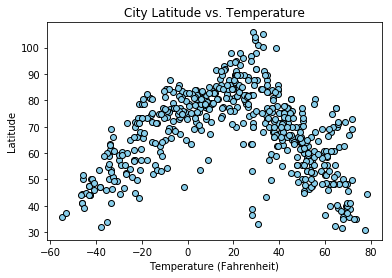

In [7]:
#Latitude vs. Temperature Plot
plt.scatter([lat], [max_temp], marker="o", facecolors="skyblue", edgecolors="black")

plt.title("City Latitude vs. Temperature")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Latitude")

plt.savefig('../starter_code/images/Lat_vs_Temp.png')

plt.show()

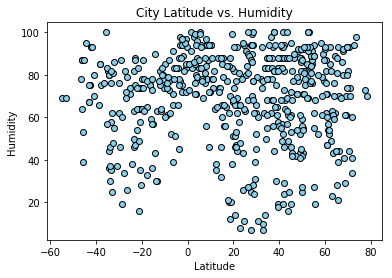

In [8]:
#Latitude vs. Humidity Plot
plt.scatter([lat], [humidity], marker="o", facecolors="skyblue", edgecolors="black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig('../starter_code/images/Lat_vs_Humidity.png')

plt.show()

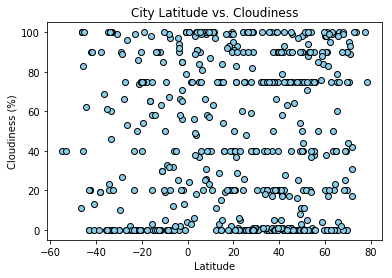

In [9]:
#Latitude vs. Cloudiness Plot
plt.scatter([lat], [cloudiness], marker="o", facecolors="skyblue", edgecolors="black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig('../starter_code/images/Lat_vs_Cloudiness.png')

plt.show()

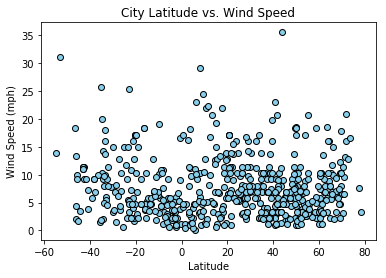

In [10]:
#Latitude vs. Wind Speed Plot
plt.scatter([lat], [wind_speed], marker="o", facecolors="skyblue", edgecolors="black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig('../starter_code/images/Lat_vs_Wind_Speed.png')

plt.show()